In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib.dates import DateFormatter, YearLocator

def skip_custom_rows(row_number):
    if row_number in [0, 2]:
        return True
    return False

# Calibration part

In [2]:
def dataset(filename):
    df = pd.read_csv(filename, sep="\t",skiprows=skip_custom_rows)
    df[df.columns[0]] = pd.to_datetime(df.iloc[:, 0]).dt.normalize()
    df = df.set_index(df.columns[0])
    df.replace(-999, np.nan, inplace=True)  # Replace -999 values with NaN
    return df
filenames = {
    "Observed Ground Water Level": "Borehole_Records.txt",
    "Observed Discharge": "Discharge_Records.txt",
    "Simulated Discharge": "OperatedDetailedTS_M11.txt",
    "Simulated Ground Water Level": "OperatedDetailedTS_SZ.txt"
}

base_path = "C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Calibration"

filepaths = {key: Path(base_path, value) for key, value in filenames.items()}

# Call the get_dataset() function for each file and store the results in the datasets_M11 dictionary
datasets = {key: dataset(filepath) for key, filepath in filepaths.items()}

def nash_sutcliffe_efficiency(observed, simulated):
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

def correlation_coefficient(observed, simulated):
    return pearsonr(observed, simulated)[0]

def percentage_deviation(observed, simulated):
    return (np.mean(simulated) - np.mean(observed)) / np.mean(observed) * 100

def stat(a,b,c):
    observed_data = datasets[a].loc['1970-12-01':'1980-12-31', c].dropna()
    simulated_data = datasets[b].loc['1970-12-01':'1980-12-31', c].reindex(observed_data.index)
    nse = nash_sutcliffe_efficiency(observed_data, simulated_data)
    r = correlation_coefficient(observed_data, simulated_data)
    dv = percentage_deviation(observed_data, simulated_data)
    print("Nash-Sutcliffe Efficiency (NSE):", nse)
    print("Correlation Coefficient (r):", r)
    print("Percentage Deviation in Simulated Mean Flow (Dv):", dv)


## Obs 5 Calibration

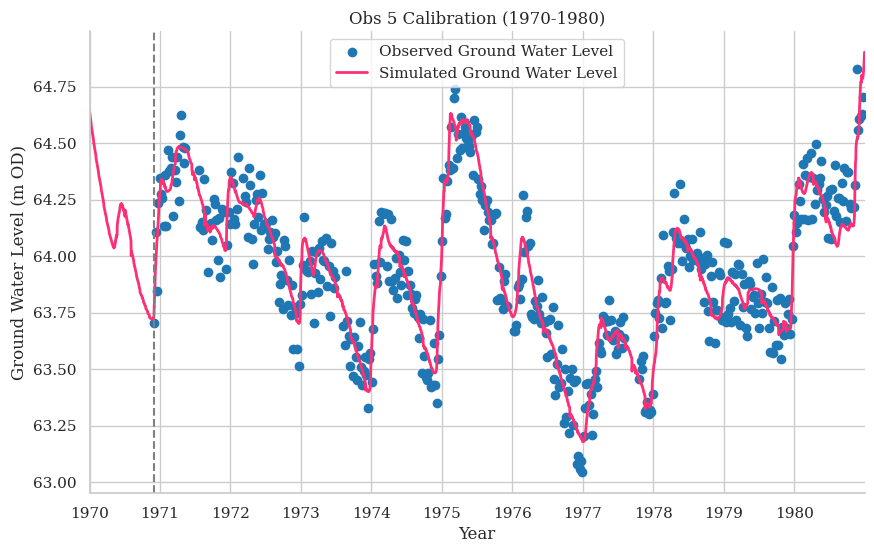

In [3]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Ground Water Level", "Simulated Ground Water Level"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Ground Water Level":
        ax.scatter(df.index, df['Obs 5'], label=key, color=colors[i])  
    else:
        ax.plot(df.index, df['Obs 5'], label=key, linewidth=2, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel('Ground Water Level (m OD)')
ax.set_title('Obs 5 Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Obs 5 Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [4]:
a = "Observed Ground Water Level"
b = "Simulated Ground Water Level"
c = "Obs 5"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.8863329414620422
Correlation Coefficient (r): 0.941860683411331
Percentage Deviation in Simulated Mean Flow (Dv): 0.0078272544037909


## Obs 35 Calibration

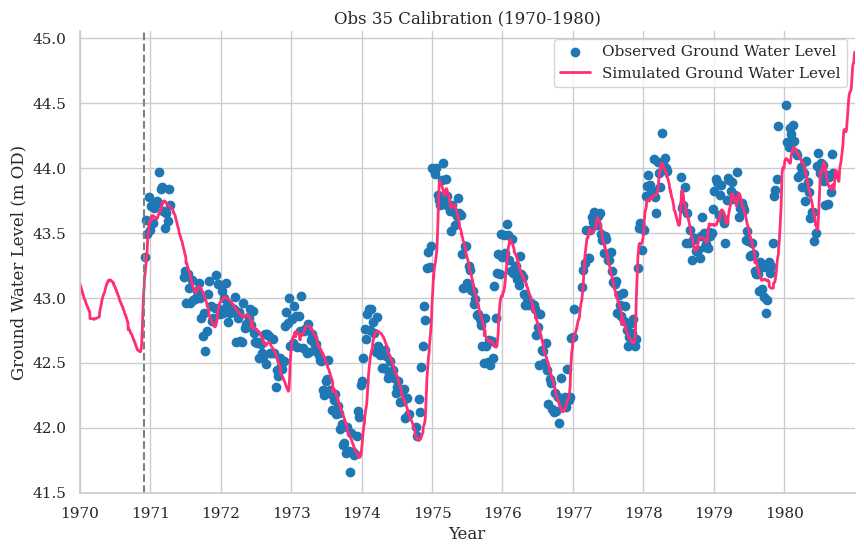

In [5]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Ground Water Level", "Simulated Ground Water Level"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Ground Water Level":
        ax.scatter(df.index, df['Obs 35'], label=key, color=colors[i])  
    else:
        ax.plot(df.index, df['Obs 35'], label=key, linewidth=2, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel('Ground Water Level (m OD)')
ax.set_title('Obs 35 Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Obs 35 Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [6]:
a = "Observed Ground Water Level"
b = "Simulated Ground Water Level"
c = "Obs 35"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.8609399430113254
Correlation Coefficient (r): 0.9304753591928471
Percentage Deviation in Simulated Mean Flow (Dv): -0.08104266610424204


## Obs 37 Calibration

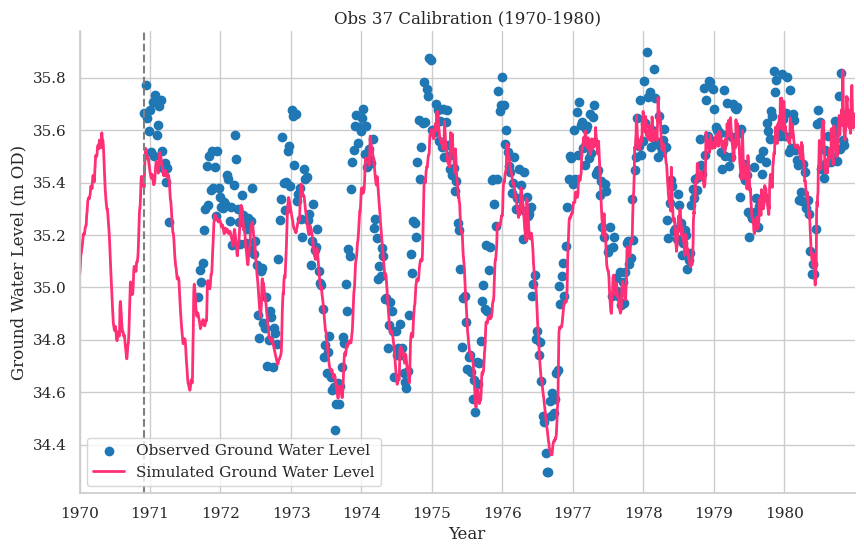

In [7]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Ground Water Level", "Simulated Ground Water Level"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Ground Water Level":
        ax.scatter(df.index, df['Obs 37'], label=key, color=colors[i])  
    else:
        ax.plot(df.index, df['Obs 37'], label=key, linewidth=2, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel('Ground Water Level (m OD)')
ax.set_title('Obs 37 Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Obs 37 Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [8]:
a = "Observed Ground Water Level"
b = "Simulated Ground Water Level"
c = "Obs 37"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.6746445145975369
Correlation Coefficient (r): 0.862364579861052
Percentage Deviation in Simulated Mean Flow (Dv): -0.2337598581641644


## Obs 65 Calibration

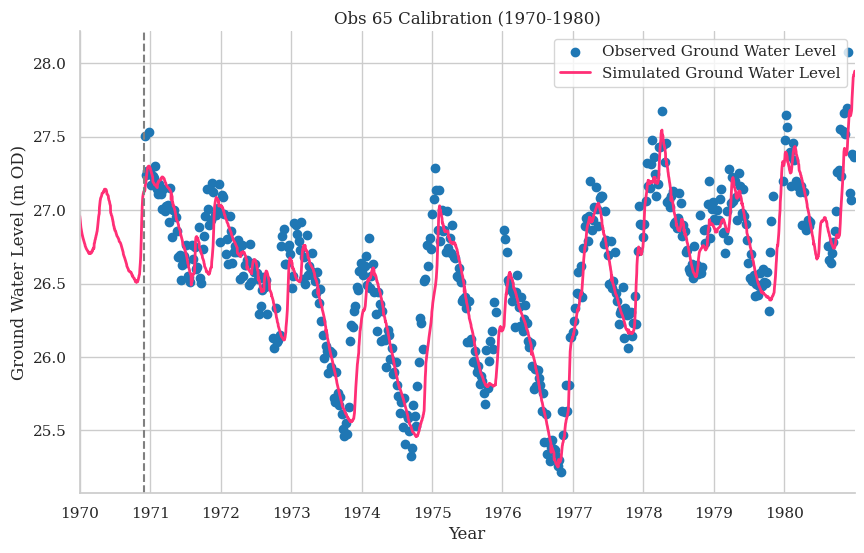

In [9]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Ground Water Level", "Simulated Ground Water Level"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Ground Water Level":
        ax.scatter(df.index, df['Obs 65'], label=key, color=colors[i])  
    else:
        ax.plot(df.index, df['Obs 65'], label=key, linewidth=2, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel('Ground Water Level (m OD)')
ax.set_title('Obs 65 Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Obs 65 Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [10]:
a = "Observed Ground Water Level"
b = "Simulated Ground Water Level"
c = "Obs 65"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.8098220698937683
Correlation Coefficient (r): 0.9083021668828098
Percentage Deviation in Simulated Mean Flow (Dv): -0.15659701077985222


## Hagebro Calibration

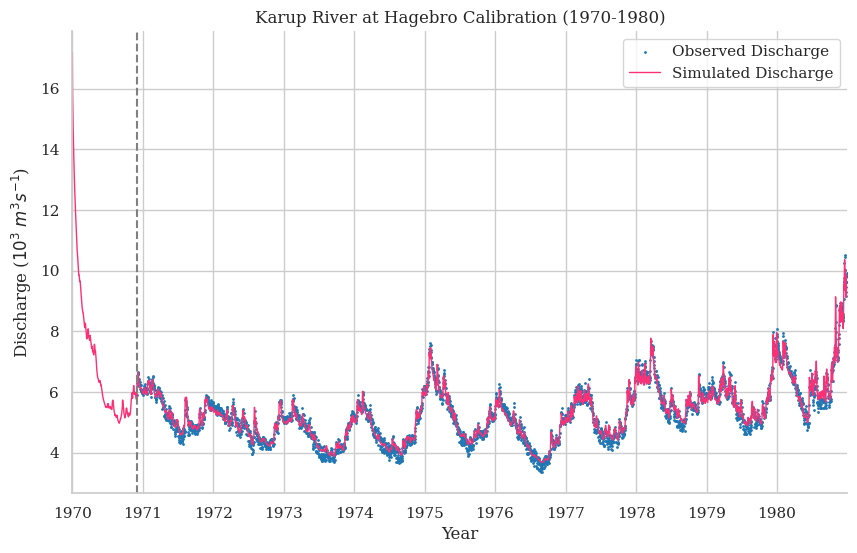

In [11]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Discharge", "Simulated Discharge"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Discharge":
        ax.scatter(df.index, df['Karup River at Hagebro'], label=key, s=1, color=colors[i])  
    else:
        ax.plot(df.index, df['Karup River at Hagebro'], label=key, linewidth=1, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Karup River at Hagebro Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Karup River at Hagebro Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [12]:
a = "Observed Discharge"
b = "Simulated Discharge"
c = "Karup River at Hagebro"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.9738829931536996
Correlation Coefficient (r): 0.9877700257051653
Percentage Deviation in Simulated Mean Flow (Dv): 0.21850018493679083


## Karup Calibration

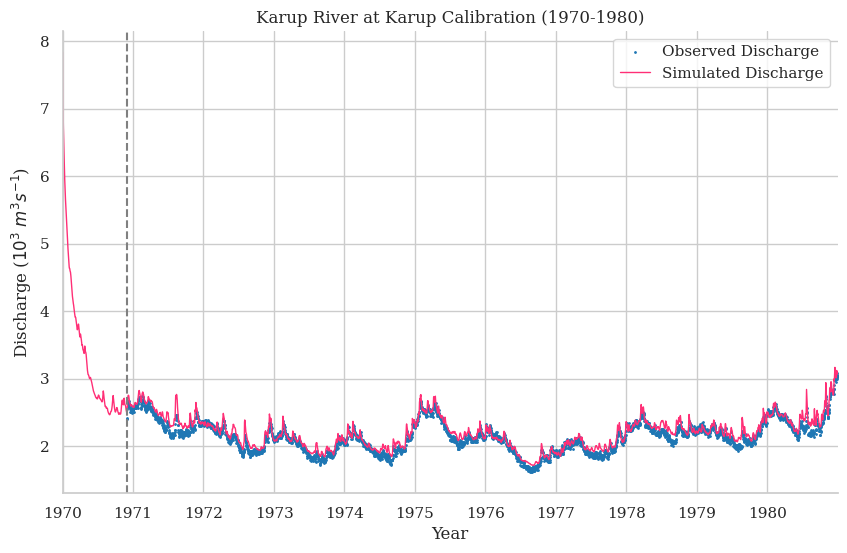

In [13]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff2f76"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

keys_to_process = ["Observed Discharge", "Simulated Discharge"]

for i, key in enumerate(keys_to_process):
    df = datasets[key]
    if key == "Observed Discharge":
        ax.scatter(df.index, df['Karup River at Karup'], label=key, s=1, color=colors[i])  
    else:
        ax.plot(df.index, df['Karup River at Karup'], label=key, linewidth=1, color=colors[i])  # Keep as line chart for other keys
# Format the x-axis as dates
date_formatter = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_formatter)
ax.xaxis.set_major_locator(YearLocator())
ax.set_xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('1980-12-31'))
ax.axvline(pd.Timestamp('1970-12-01'), linestyle='--', color='gray')  # Add a long-dashed line at x = 1970-12-01
ax.set_xlabel('Year')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Karup River at Karup Calibration (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Karup River at Karup Calibration (1970-1980).png'
plt.savefig(ofile)

plt.show()

In [14]:
a = "Observed Discharge"
b = "Simulated Discharge"
c = "Karup River at Karup"
stat(a,b,c)

Nash-Sutcliffe Efficiency (NSE): 0.8816132567260394
Correlation Coefficient (r): 0.9721567504874088
Percentage Deviation in Simulated Mean Flow (Dv): 2.7045043328125224


# Climate part

In [15]:
def get_dataset(filename):
    df = pd.read_csv(filename, sep="\t",skiprows=skip_custom_rows, parse_dates=["Time"], index_col="Time")
    
    monthly_average = df.resample('M').mean()

    # Calculate the average of the monthly averages over the years
    monthly_average_over_years = monthly_average.groupby(monthly_average.index.month).mean()
    return monthly_average_over_years

## PET or P only

## Plot the chart for Karup River at Hagebro

In [16]:
filenames_onlyM11 = {
    "Baseline": "ObservationDetailedTS_M11.txt",
    "2050s Low P Only": "2050s Low P OnlyDetailedTS_M11.txt",
    "2050s Low PET Only": "2050s Low PET OnlyDetailedTS_M11.txt"
}

base_path = "C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Climate"

filepaths_onlyM11 = {key: Path(base_path, value) for key, value in filenames_onlyM11.items()}

# Call the get_dataset() function for each file and store the results in the datasets_M11 dictionary
datasets_onlyM11 = {key: get_dataset(filepath) for key, filepath in filepaths_onlyM11.items()}

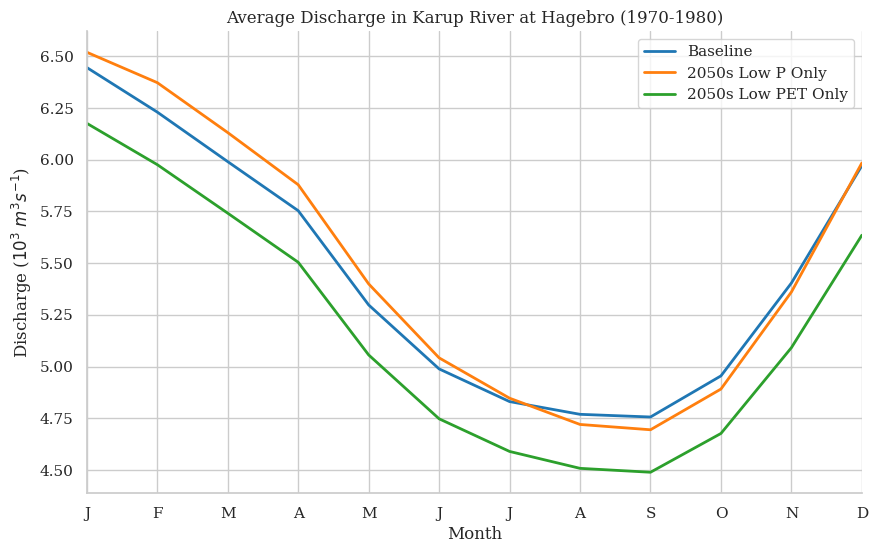

In [17]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlyM11.items()):
    ax.plot(df.index, df['Karup River at Hagebro'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Average Discharge in Karup River at Hagebro (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Discharge Hagebro.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for Karup River at Karup

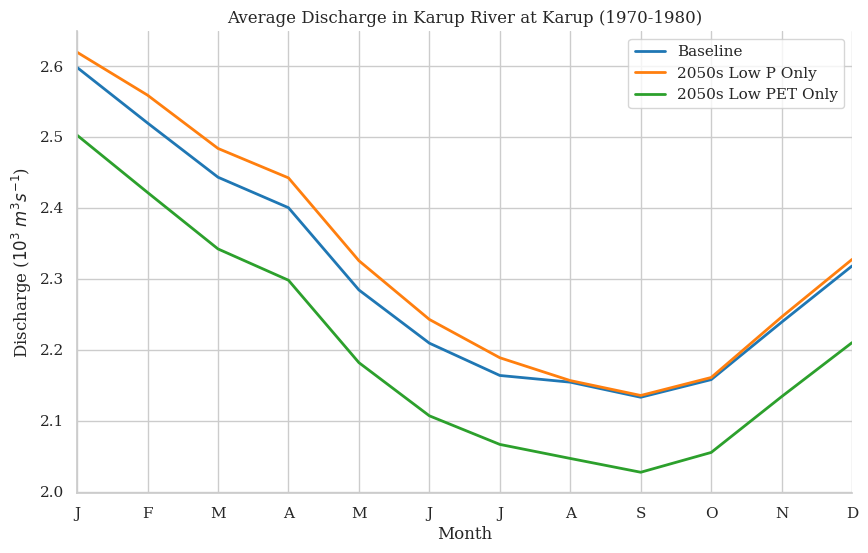

In [18]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlyM11.items()):
    ax.plot(df.index, df['Karup River at Karup'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Average Discharge in Karup River at Karup (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Discharge Karup.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 5

In [19]:
filenames_onlySZ = {
    "Baseline": "ObservationDetailedTS_SZ.txt",
    "2050s Low P Only": "2050s Low P OnlyDetailedTS_SZ.txt",
    "2050s Low PET Only": "2050s Low PET OnlyDetailedTS_SZ.txt"
}

base_path = "C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Climate"

filepaths_onlySZ = {key: Path(base_path, value) for key, value in filenames_onlySZ.items()}

# Call the get_dataset() function for each file and store the results in the datasets_M11 dictionary
datasets_onlySZ = {key: get_dataset(filepath) for key, filepath in filepaths_onlySZ.items()}

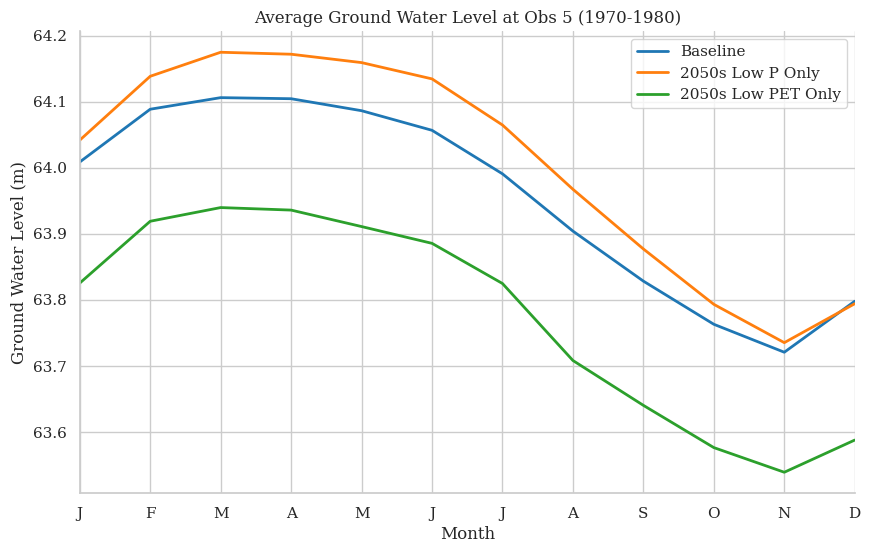

In [20]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlySZ.items()):
    ax.plot(df.index, df['Obs 5'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 5 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Ground Water Level at Obs 5.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 35

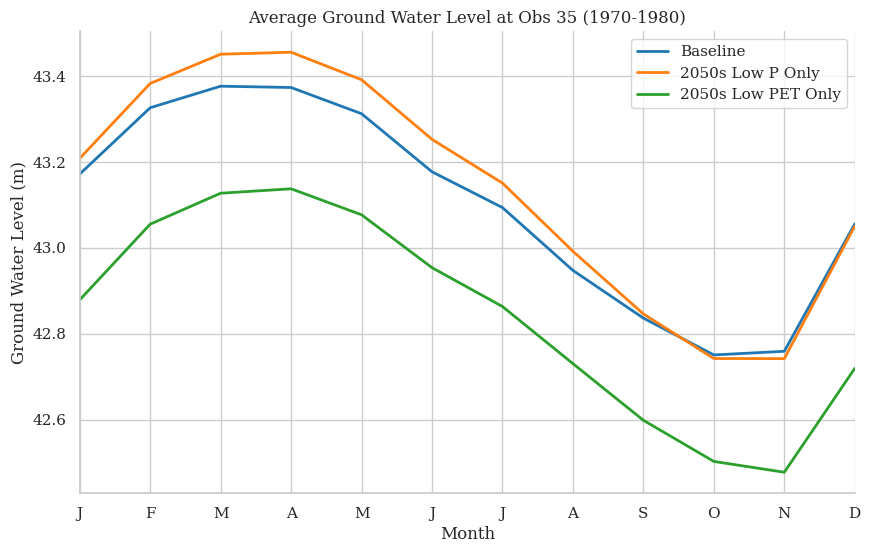

In [21]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlySZ.items()):
    ax.plot(df.index, df['Obs 35'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 35 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Ground Water Level at Obs 35.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 37

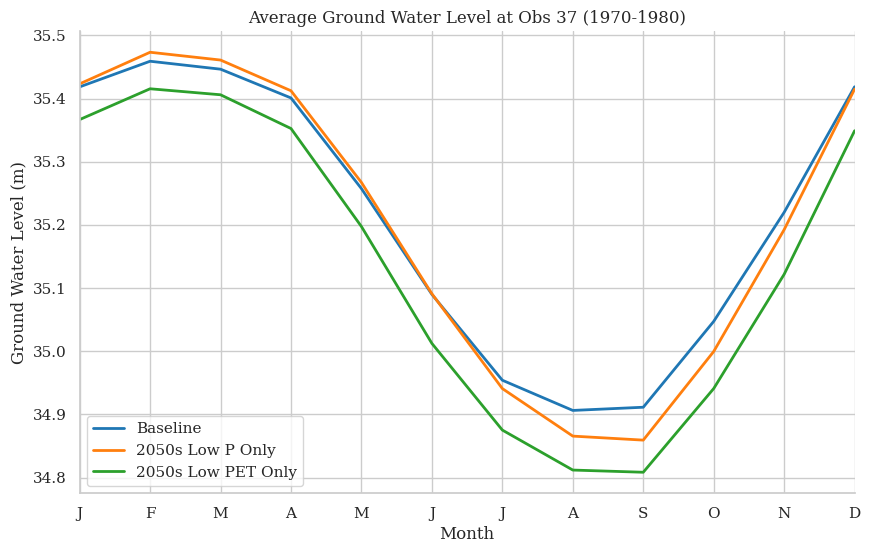

In [22]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlySZ.items()):
    ax.plot(df.index, df['Obs 37'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 37 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Ground Water Level at Obs 37.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 65

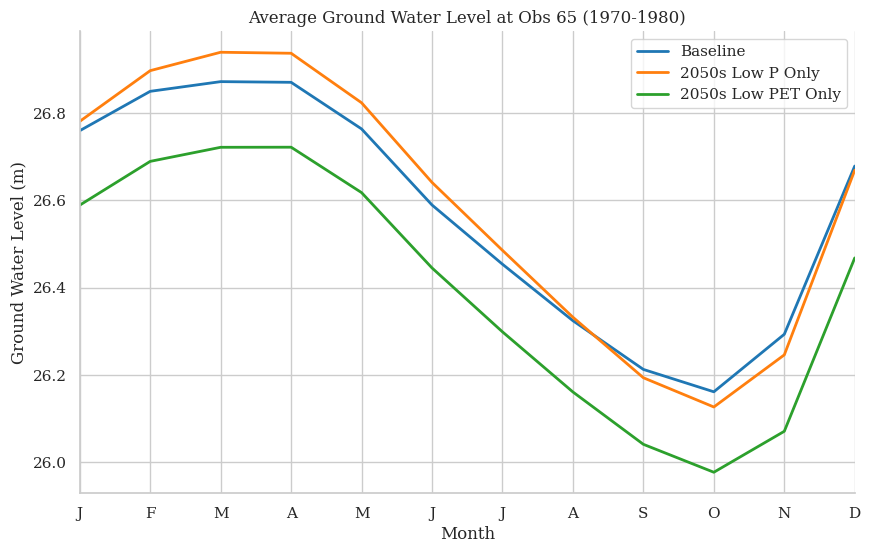

In [23]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_onlySZ.items()):
    ax.plot(df.index, df['Obs 65'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 65 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Only Average Ground Water Level at Obs 65.png'
plt.savefig(ofile)

plt.show()

## 2050s Low Medium High

## Plot the chart for Karup River at Hagebro

In [24]:
filenames_M11 = {
    "Baseline": "ObservationDetailedTS_M11.txt",
    "2050s Low": "2050s LowDetailedTS_M11.txt",
    "2050s Medium": "2050s MediumDetailedTS_M11.txt",
    "2050s High": "2050s HighDetailedTS_M11.txt"
}

base_path = "C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Climate"

filepaths_M11 = {key: Path(base_path, value) for key, value in filenames_M11.items()}

# Call the get_dataset() function for each file and store the results in the datasets_M11 dictionary
datasets_M11 = {key: get_dataset(filepath) for key, filepath in filepaths_M11.items()}

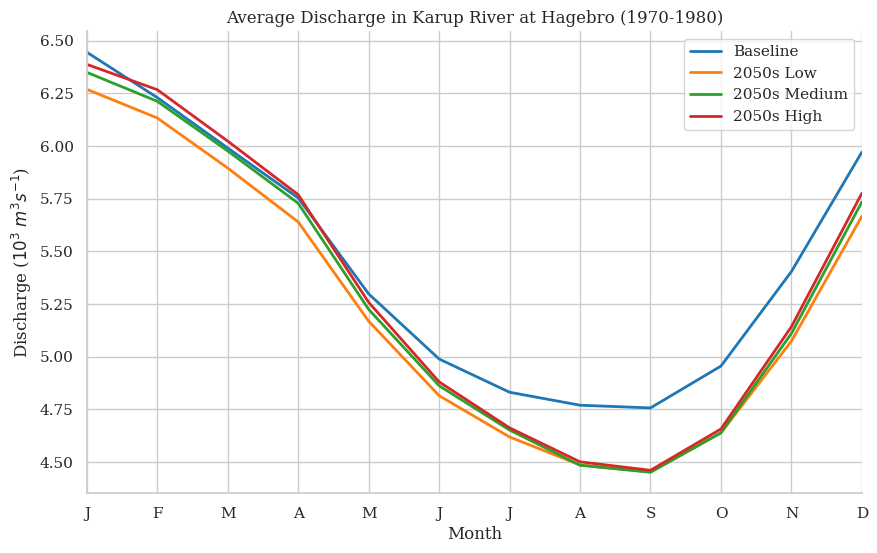

In [25]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_M11.items()):
    ax.plot(df.index, df['Karup River at Hagebro'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Average Discharge in Karup River at Hagebro (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Discharge in Karup River at Hagebro.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for Karup River at Karup

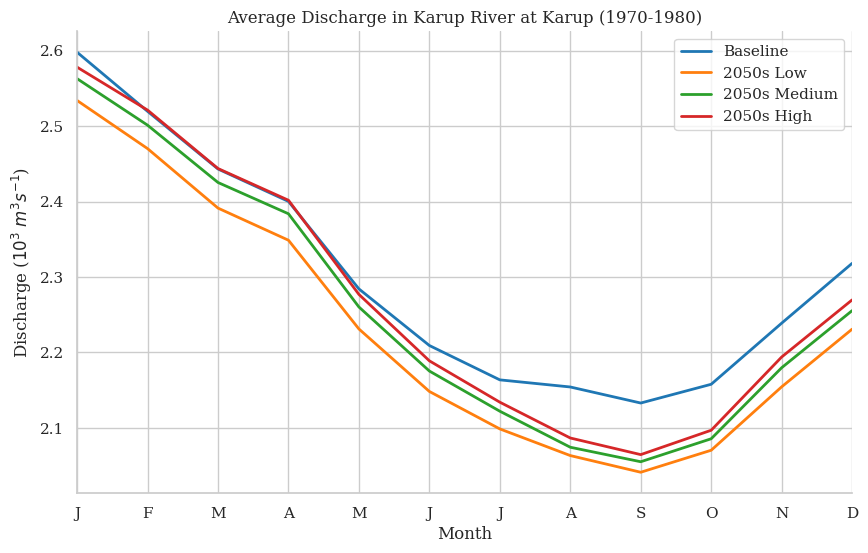

In [26]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_M11.items()):
    ax.plot(df.index, df['Karup River at Karup'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel(r'Discharge ($10^3\ m^3s^{-1}$)')
ax.set_title('Average Discharge in Karup River at Karup (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Discharge in Karup River at Karup.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 5

In [27]:
filenames_SZ = {
    "Observation": "ObservationDetailedTS_SZ.txt",
    "2050s Low": "2050s LowDetailedTS_SZ.txt",
    "2050s Medium": "2050s MediumDetailedTS_SZ.txt",
    "2050s High": "2050s HighDetailedTS_SZ.txt"
}

base_path = "C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Climate"

filepaths_SZ = {key: Path(base_path, value) for key, value in filenames_SZ.items()}

# Call the get_dataset() function for each file and store the results in the datasets_SZ dictionary
datasets_SZ = {key: get_dataset(filepath) for key, filepath in filepaths_SZ.items()}

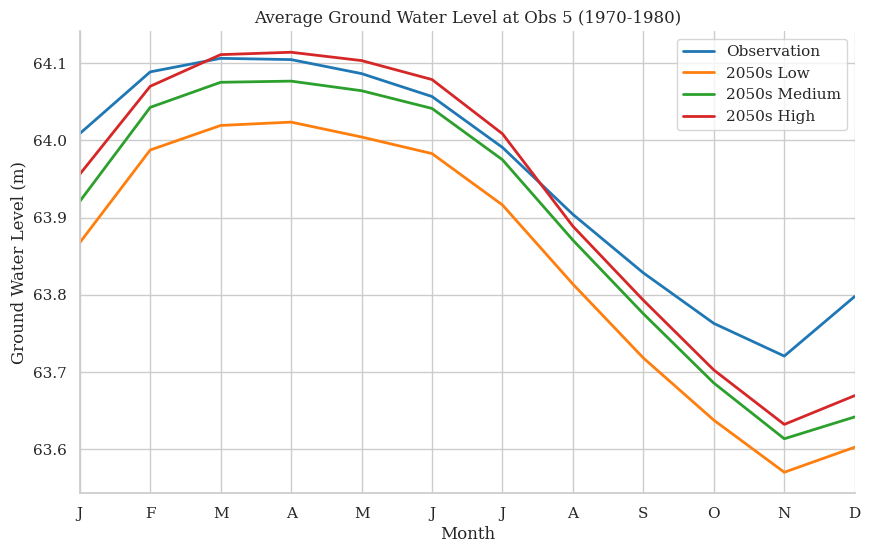

In [28]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_SZ.items()):
    ax.plot(df.index, df['Obs 5'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 5 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Ground Water Level at Obs 5.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 35

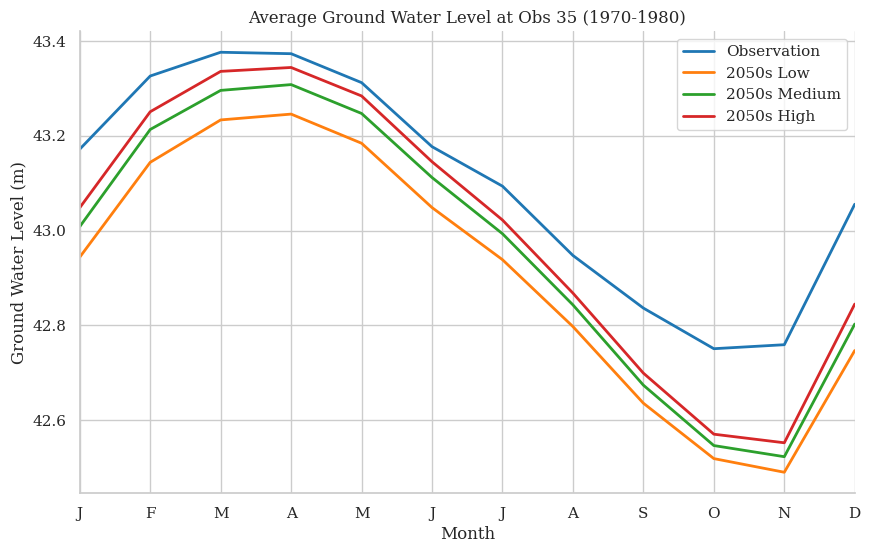

In [29]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_SZ.items()):
    ax.plot(df.index, df['Obs 35'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 35 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Ground Water Level at Obs 35.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 37

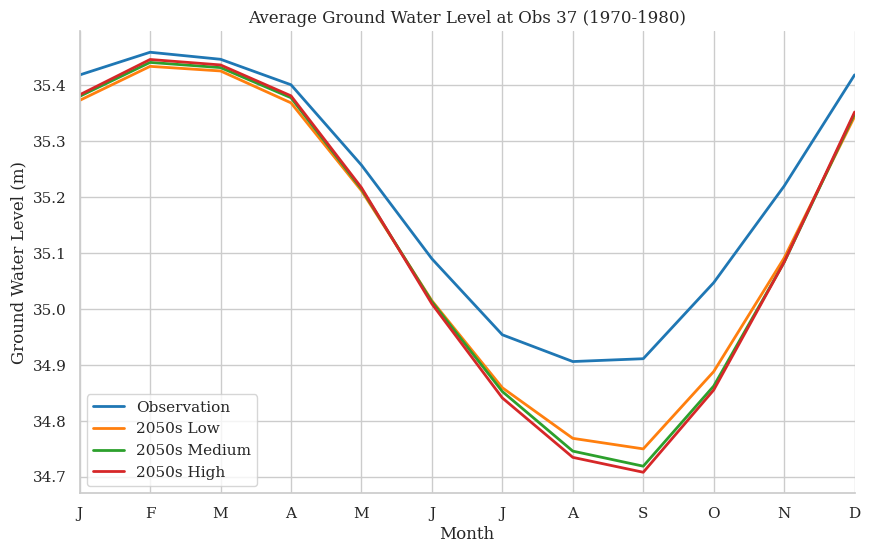

In [30]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_SZ.items()):
    ax.plot(df.index, df['Obs 37'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 37 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Ground Water Level at Obs 37.png'
plt.savefig(ofile)

plt.show()

## Plot the chart for obs 65

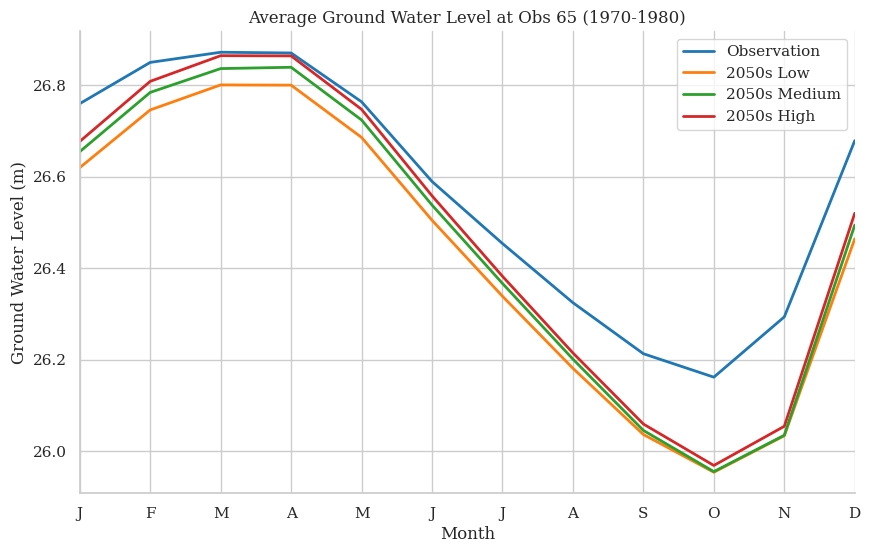

In [31]:
# Set the seaborn style to improve plot aesthetics
sns.set(style="whitegrid")

# Set custom font type and size
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14

# Define custom line colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (key, df) in enumerate(datasets_SZ.items()):
    ax.plot(df.index, df['Obs 65'], label=key, linewidth=2, color=colors[i])

ax.set_xticks(range(1, 13))
ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax.set_xlim(1, 12)
ax.set_xlabel('Month')
ax.set_ylabel('Ground Water Level (m)')
ax.set_title('Average Ground Water Level at Obs 65 (1970-1980)')
ax.legend()

# Remove top and right spines
sns.despine()

# save plot to PNG file
ofile = 'C:/Users/Albert/Desktop/Master/Surface water modelling/Coursework/Part2/Average Ground Water Level at Obs 65.png'
plt.savefig(ofile)

plt.show()